In [140]:
import pandas as pd
import numpy as np
import os
import regex as re
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
df = pd.read_csv('./dataset/dataset_uncleaned.csv', engine='python', encoding= 'unicode_escape')
df.count()

Disease                         134
Count of Disease Occurrence     134
Symptom                        1865
dtype: int64

In [142]:
df.head()

Disease  Count of Disease Occurrence  \
0  UMLS:C0020538_hypertensive disease                       3363.0   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   

                             Symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall

In [143]:
df = df.fillna(0)

In [122]:
fill = df['Disease'].iloc[0]
for i in range(1,1867):
    if df['Disease'].iloc[i] == 0:
        df['Disease'].iloc[i] = fill
    else:
        fill = df['Disease'].iloc[i]
df['Disease']

C:\Users\aruno\AppData\Local\Temp\ipykernel_2180\3525003240.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Disease'].iloc[i] = fill
C:\Users\aruno\AppData\Local\Temp\ipykernel_2180\3525003240.py:4: SettingWithCopyWarning: 
A value i

0       UMLS:C0020538_hypertensive disease
1       UMLS:C0020538_hypertensive disease
2       UMLS:C0020538_hypertensive disease
3       UMLS:C0020538_hypertensive disease
4       UMLS:C0020538_hypertensive disease
                       ...                
1862           UMLS:C0233472_affect labile
1863         UMLS:C0011127_decubitus ulcer
1864         UMLS:C0011127_decubitus ulcer
1865         UMLS:C0011127_decubitus ulcer
1866         UMLS:C0011127_decubitus ulcer
Name: Disease, Length: 1867, dtype: object

In [123]:
fill = df['Count of Disease Occurrence'].iloc[0]
for i in range(1,1867):
    if df['Count of Disease Occurrence'].iloc[i] == 0.0:
        df['Count of Disease Occurrence'].iloc[i] = fill
    else:
        fill = df['Count of Disease Occurrence'].iloc[i]
df['Count of Disease Occurrence']

C:\Users\aruno\AppData\Local\Temp\ipykernel_2180\727697979.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Count of Disease Occurrence'].iloc[i] = fill
C:\Users\aruno\AppData\Local\Temp\ipykernel_2180\727697979.py:4: SettingWithCopyW

0       3363.0
1       3363.0
2       3363.0
3       3363.0
4       3363.0
         ...  
1862      45.0
1863      42.0
1864      42.0
1865      42.0
1866      42.0
Name: Count of Disease Occurrence, Length: 1867, dtype: float64

In [124]:
df = df[df.Symptom != 0]
df

Disease  Count of Disease Occurrence  \
0     UMLS:C0020538_hypertensive disease                       3363.0   
1     UMLS:C0020538_hypertensive disease                       3363.0   
2     UMLS:C0020538_hypertensive disease                       3363.0   
3     UMLS:C0020538_hypertensive disease                       3363.0   
4     UMLS:C0020538_hypertensive disease                       3363.0   
...                                  ...                          ...   
1861         UMLS:C0233472_affect labile                         45.0   
1862         UMLS:C0233472_affect labile                         45.0   
1863       UMLS:C0011127_decubitus ulcer                         42.0   
1864       UMLS:C0011127_decubitus ulcer                         42.0   
1865       UMLS:C0011127_decubitus ulcer                         42.0   

                                              Symptom  
0                            UMLS:C0008031_pain chest  
1                   UMLS:C0392680_shortness of breath  
2                             UMLS:C0012833_dizziness  
3                              UMLS:C0004093_asthenia  
4                                  UMLS:C0085639_fall  
...                                               ...  
1861  UMLS:C0425251_bedridden^UMLS:C0741453_bedridden  
1862                         UMLS:C0242453_prostatism  
1863                    UMLS:C0232257_systolic murmur  
1864                              UMLS:C0871754_frail  
1865                              UMLS:C0015967_fever  

[1865 rows x 3 columns]

In [125]:
df['Symptom'] = df['Symptom'].apply(lambda x: x.split('^'))
df['Symptom']

0                              [UMLS:C0008031_pain chest]
1                     [UMLS:C0392680_shortness of breath]
2                               [UMLS:C0012833_dizziness]
3                                [UMLS:C0004093_asthenia]
4                                    [UMLS:C0085639_fall]
                              ...                        
1861    [UMLS:C0425251_bedridden, UMLS:C0741453_bedrid...
1862                           [UMLS:C0242453_prostatism]
1863                      [UMLS:C0232257_systolic murmur]
1864                                [UMLS:C0871754_frail]
1865                                [UMLS:C0015967_fever]
Name: Symptom, Length: 1865, dtype: object

In [126]:
df = df.explode('Symptom').reset_index()

In [127]:
df.Symptom = df.Symptom.apply(lambda x: x.split('_')[1])
df

index                             Disease  Count of Disease Occurrence  \
0         0  UMLS:C0020538_hypertensive disease                       3363.0   
1         1  UMLS:C0020538_hypertensive disease                       3363.0   
2         2  UMLS:C0020538_hypertensive disease                       3363.0   
3         3  UMLS:C0020538_hypertensive disease                       3363.0   
4         4  UMLS:C0020538_hypertensive disease                       3363.0   
...     ...                                 ...                          ...   
1902   1861         UMLS:C0233472_affect labile                         45.0   
1903   1862         UMLS:C0233472_affect labile                         45.0   
1904   1863       UMLS:C0011127_decubitus ulcer                         42.0   
1905   1864       UMLS:C0011127_decubitus ulcer                         42.0   
1906   1865       UMLS:C0011127_decubitus ulcer                         42.0   

                  Symptom  
0              pain chest  
1     shortness of breath  
2               dizziness  
3                asthenia  
4                    fall  
...                   ...  
1902            bedridden  
1903           prostatism  
1904      systolic murmur  
1905                frail  
1906                fever  

[1907 rows x 4 columns]

In [128]:
df['Disease'] = df['Disease'].apply(lambda x: x.split('^'))
df = df.explode('Disease').reset_index()
df.Disease = df.Disease.apply(lambda x: x.split('_')[1])
df

level_0  index               Disease  Count of Disease Occurrence  \
0           0      0  hypertensive disease                       3363.0   
1           1      1  hypertensive disease                       3363.0   
2           2      2  hypertensive disease                       3363.0   
3           3      3  hypertensive disease                       3363.0   
4           4      4  hypertensive disease                       3363.0   
...       ...    ...                   ...                          ...   
2124     1902   1861         affect labile                         45.0   
2125     1903   1862         affect labile                         45.0   
2126     1904   1863       decubitus ulcer                         42.0   
2127     1905   1864       decubitus ulcer                         42.0   
2128     1906   1865       decubitus ulcer                         42.0   

                  Symptom  
0              pain chest  
1     shortness of breath  
2               dizziness  
3                asthenia  
4                    fall  
...                   ...  
2124            bedridden  
2125           prostatism  
2126      systolic murmur  
2127                frail  
2128                fever  

[2129 rows x 5 columns]

In [129]:
df.drop(['index', 'level_0','Count of Disease Occurrence'], axis = 1, inplace = True)
df

Disease              Symptom
0     hypertensive disease           pain chest
1     hypertensive disease  shortness of breath
2     hypertensive disease            dizziness
3     hypertensive disease             asthenia
4     hypertensive disease                 fall
...                    ...                  ...
2124         affect labile            bedridden
2125         affect labile           prostatism
2126       decubitus ulcer      systolic murmur
2127       decubitus ulcer                frail
2128       decubitus ulcer                fever

[2129 rows x 2 columns]

In [130]:
df_sparse = pd.get_dummies(df, columns = ['Symptom']).drop('Symptom_', axis=1).drop_duplicates()
df_sparse.head()

Disease  Symptom_Heberden's node  Symptom_Murphy's sign  \
0  hypertensive disease                    False                  False   
1  hypertensive disease                    False                  False   
2  hypertensive disease                    False                  False   
3  hypertensive disease                    False                  False   
4  hypertensive disease                    False                  False   

   Symptom_Stahli's line  Symptom_abdomen acute  Symptom_abdominal bloating  \
0                  False                  False                       False   
1                  False                  False                       False   
2                  False                  False                       False   
3                  False                  False                       False   
4                  False                  False                       False   

   Symptom_abdominal tenderness  Symptom_abnormal sensation  \
0                         False                       False   
1                         False                       False   
2                         False                       False   
3                         False                       False   
4                         False                       False   

   Symptom_abnormally hard consistency  Symptom_abortion  ...  \
0                                False             False  ...   
1                                False             False  ...   
2                                False             False  ...   
3                                False             False  ...   
4                                False             False  ...   

   Symptom_vision blurred  Symptom_vomiting  Symptom_weepiness  \
0                   False             False              False   
1                   False             False              False   
2                   False             False              False   
3                   False             False              False   
4                   False             False              False   

   Symptom_weight gain  Symptom_welt  Symptom_wheelchair bound  \
0                False         False                     False   
1                False         False                     False   
2                False         False                     False   
3                False         False                     False   
4                False         False                     False   

   Symptom_wheezing  Symptom_withdraw  Symptom_worry  Symptom_yellow sputum  
0             False             False          False                  False  
1             False             False          False                  False  
2             False             False          False                  False  
3             False             False          False                  False  
4             False             False          False                  False  

[5 rows x 405 columns]

In [131]:
df_sparse = df_sparse.groupby('Disease').sum().reset_index()
df_sparse.head()

Disease  Symptom_Heberden's node  \
0                  Alzheimer's disease                        0   
1                                  HIV                        0   
2       Pneumocystis carinii pneumonia                        0   
3             accident cerebrovascular                        0   
4  acquired immuno-deficiency syndrome                        0   

   Symptom_Murphy's sign  Symptom_Stahli's line  Symptom_abdomen acute  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   Symptom_abdominal bloating  Symptom_abdominal tenderness  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Symptom_abnormal sensation  Symptom_abnormally hard consistency  \
0                           0                                    0   
1                           0                                    0   
2                           0                                    0   
3                           0                                    0   
4                           0                                    0   

   Symptom_abortion  ...  Symptom_vision blurred  Symptom_vomiting  \
0                 0  ...                       0                 0   
1                 0  ...                       0                 0   
2                 0  ...                       0                 0   
3                 0  ...                       0                 0   
4                 0  ...                       0                 0   

   Symptom_weepiness  Symptom_weight gain  Symptom_welt  \
0                  0                    0             0   
1                  0                    0             0   
2                  0                    0             0   
3                  0                    0             0   
4                  0                    0             0   

   Symptom_wheelchair bound  Symptom_wheezing  Symptom_withdraw  \
0                         1                 0                 0   
1                         0                 0                 0   
2                         0                 0                 0   
3                         0                 0                 0   
4                         0                 0                 0   

   Symptom_worry  Symptom_yellow sputum  
0              0                      0  
1              0                      0  
2              0                      1  
3              0                      0  
4              0                      0  

[5 rows x 405 columns]

In [132]:
X = df_sparse[df_sparse.columns[1:]]
Y = df_sparse['Disease']

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
xgb_clf = GradientBoostingClassifier()
xgb_clf.fit(X, Y)
score = xgb_clf.score(X, Y)
print(score)

0.8993288590604027


In [137]:
print ("DecisionTree")
clf = DecisionTreeClassifier()
model = clf.fit(X,Y)
print ("Acurracy: ", model.score(X,Y))

DecisionTree
Acurracy:  0.8993288590604027


In [138]:
model.predict(x_test)

array(['sepsis (invertebrate)', 'neutropenia', 'failure heart congestive',
       'hypertensive disease', 'affect labile',
       'mitral valve insufficiency', 'tachycardia sinus',
       'carcinoma breast', 'paranoia', 'incontinence', 'confusion',
       'dependence', 'encephalopathy', 'cardiomyopathy',
       'deep vein thrombosis', 'schizophrenia', 'obesity morbid',
       'hernia\xa0hiatal', 'bipolar disorder', 'depression mental',
       'dehydration', 'anemia', 'infection', 'carcinoma of lung',
       'gastritis', 'lymphoma', 'ketoacidosis diabetic', 'cholecystitis',
       'dementia', 'sepsis (invertebrate)'], dtype=object)

In [139]:
model.score(x_test, y_test)

0.9333333333333333

In [29]:
input_data = pd.read_csv('dataset/Training.csv')
input_data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [31]:
test_data = pd.read_csv('dataset\Testing.csv')
test_data.head()

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\aruno\AppData\Local\Temp\ipykernel_2180\2903488384.py:1: SyntaxWarning: invalid escape sequence '\T'
  test_data = pd.read_csv('dataset\Testing.csv')


itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze            prognosis  
0                  0     Fungal infection  
1                  0              Allergy  
2                  0                 GERD  
3                  0  Chronic cholestasis  
4                  0        Drug Reaction  

[5 rows x 133 columns]

In [32]:
input_data.shape

(4920, 133)

In [33]:
input_data.isnull().sum().sort_values(ascending=False)

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [34]:
input_data['prognosis'].value_counts(normalize = True)

prognosis
Fungal infection                           0.02439
Allergy                                    0.02439
GERD                                       0.02439
Chronic cholestasis                        0.02439
Drug Reaction                              0.02439
Peptic ulcer diseae                        0.02439
AIDS                                       0.02439
Diabetes                                   0.02439
Gastroenteritis                            0.02439
Bronchial Asthma                           0.02439
Hypertension                               0.02439
Migraine                                   0.02439
Cervical spondylosis                       0.02439
Paralysis (brain hemorrhage)               0.02439
Jaundice                                   0.02439
Malaria                                    0.02439
Chicken pox                                0.02439
Dengue                                     0.02439
Typhoid                                    0.02439
hepatitis A          

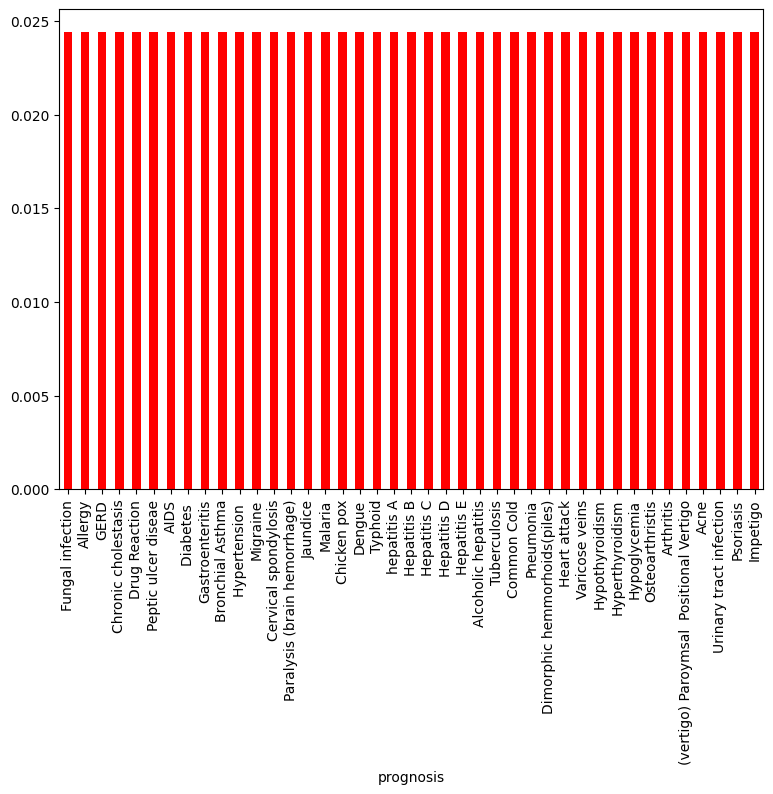

In [35]:
input_data['prognosis'].value_counts(normalize = True).plot.bar(color='red')
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

In [40]:
pd.crosstab(input_data['cold_hands_and_feets'],input_data['weight_gain'])

weight_gain              0    1
cold_hands_and_feets           
0                     4800    6
1                        6  108

In [41]:
#imported the chi square contingency
from scipy.stats import chi2_contingency
#as p value is  0.0  which is less than 0.05 then they are actually different from each other which satisfy the alternate hypothesis 
chi2_contingency(pd.crosstab(input_data['cold_hands_and_feets'],input_data['weight_gain']))

Chi2ContingencyResult(statistic=np.float64(4362.40173527245), pvalue=np.float64(0.0), dof=1, expected_freq=array([[4.69464146e+03, 1.11358537e+02],
       [1.11358537e+02, 2.64146341e+00]]))

In [42]:
x = input_data.drop(['prognosis'],axis =1)
y = input_data['prognosis']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [44]:
#imported naive_baye algorithm
from sklearn.naive_bayes import MultinomialNB

#fitted the model
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

score = mnb.score(x_test, y_test)
print("Accuracy Score: ",score)

Accuracy Score:  1.0


In [45]:
gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(x_train, y_train)
score = gbm_clf.score(x_train, y_train)
print(score)

1.0


In [46]:
#by cross validating we got mean also 100%
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

[1. 1. 1.]
1.0


In [47]:
scores = cross_val_score(gbm_clf, x_test, y_test, cv=10)
print (scores)
print (scores.mean())

[1.         0.98773006 0.99386503 1.         0.98765432 0.98765432
 0.98148148 0.98765432 0.9691358  1.        ]
0.989517533893812


In [48]:
real_diseases = y_test.values
y_pred = gbm_clf.predict(x_test)
#for the cross checking purpose i want to see if predicted values and actual values are same else it gives me worng prediction 
for i in range(0, 20):
    if y_pred[i] == real_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))

Pred: Acne Actual:Acne
Pred: Acne Actual:Acne
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: AIDS Actual:AIDS
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Hypertension  Actual:Hypertension 
Pred: Hypoglycemia Actual:Hypoglycemia
Pred: Arthritis Actual:Arthritis
Pred: Hepatitis B Actual:Hepatitis B
Pred: Migraine Actual:Migraine
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Diabetes  Actual:Diabetes 
Pred: Hepatitis D Actual:Hepatitis D
Pred: Psoriasis Actual:Psoriasis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Alcoholic hepatitis Actual:Alcoholic hepatitis
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Hepatitis E Actual:Hepatitis E
Pred: Diabetes  Actual:Diabetes 
Pred: Cervical spondylosis Actual:Cervical spondylosis


In [61]:
#imported Kfold
from sklearn.model_selection import KFold

## Function to run multiple algorithms with different K values of KFold.
def evaluate(train_data,kmax,algo):
    test_scores = {}
    train_scores = {}
    for i in range(2,kmax,2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = input_data
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["prognosis"],axis=1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(["prognosis"],axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("kvalue: ",i)
    return(train_scores,test_scores)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',)
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 10)

In [64]:
algo_dict = {'l_o_g':log,'d_t':dt,'r_a_n':ran,'N_B' : nb, 'G_B' : gbm}
algo_train_scores={}
algo_test_scores={}

In [65]:
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(input_data,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

l_o_g
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
d_t
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
r_a_n
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
N_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
G_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'G_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}
{'l_o_g': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'd_t': {2: 0.8719512195121951, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'r_a_n': {2: 0.9975609756097561, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'N_B': {2: 1.0, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}, 'G_B': {2: 0.9792682926829268, 4: 1.0, 6: 1.0, 8: 1.0, 10: 1.0}}


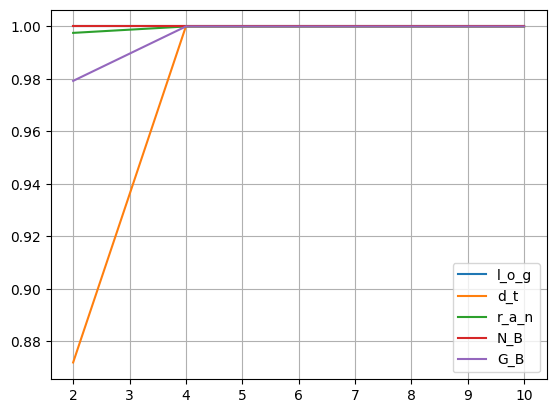

In [66]:
df_test = pd.DataFrame(algo_test_scores)
df_train = pd.DataFrame(algo_train_scores)

df_test.plot(grid = 1)
plt.show()

In [67]:
#building the model at k value 2 
test_scores={}
train_scores={}
for i in range(2,4,2):
    kf = KFold(n_splits = i)
    sum_train = 0
    sum_test = 0
    data = input_data
    for train,test in kf.split(data):
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["prognosis"],axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"],axis=1)
        y_test = test_data["prognosis"]
        algo_model = gbm.fit(x_train,y_train)
        sum_train += gbm.score(x_train,y_train)
        y_pred = gbm.predict(x_test)
        sum_test += accuracy_score(y_test,y_pred)
    average_test = sum_test/i
    average_train = sum_train/i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ",i)

kvalue:  2


In [68]:
print(train_scores)
print(test_scores)

{2: 1.0}
{2: 0.9792682926829268}


In [69]:
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]

In [70]:
features = input_data.columns[:-1]
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 36 - pain_behind_the_eyes (0.025568)
2. feature 118 - blood_in_sputum (0.024646)
3. feature 108 - rusty_sputum (0.024362)
4. feature 34 - nausea (0.023264)
5. feature 112 - receiving_unsterile_injections (0.023200)


In [71]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [72]:
feature_dict['redness_of_eyes'], feature_dict['cough']

(52, 24)

In [73]:
sample_x = [i/52 if i ==52 else i/24 if i==24 else i*0 for i in range(len(features))]
len(sample_x)

132

In [74]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))
gbm.predict(sample_x)

C:\Users\aruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array(['Common Cold'], dtype=object)

In [75]:
gbm.predict_proba(sample_x)

C:\Users\aruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([[0.02335086, 0.02376254, 0.02376254, 0.01526609, 0.02472258,
        0.02068095, 0.02520914, 0.02057126, 0.02190205, 0.07503259,
        0.18886426, 0.01466407, 0.01824035, 0.02015175, 0.02405678,
        0.02640742, 0.02106108, 0.02666252, 0.02406228, 0.01004083,
        0.01458306, 0.01952077, 0.01012928, 0.01565079, 0.01839626,
        0.01438544, 0.01519375, 0.02240397, 0.00971433, 0.01795035,
        0.0176744 , 0.01801896, 0.02507553, 0.01727485, 0.01648713,
        0.01876955, 0.00972208, 0.01816003, 0.02177354, 0.02092199,
        0.00972202]])

In [76]:
gbm.__getstate__()

{'n_estimators': 100,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'criterion': 'friedman_mse',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'subsample': 1.0,
 'max_features': None,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'init': None,
 'random_state': None,
 'alpha': 0.9,
 'verbose': 0,
 'max_leaf_nodes': None,
 'warm_start': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': None,
 'tol': 0.0001,
 'feature_names_in_': array(['itching', 'skin_rash', 'nodal_skin_eruptions',
        'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
        'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
        'vomiting', 'burning_micturition', 'spotting_ urination',
        'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
        'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
        'patches_in_throat', 'irregular_sugar_level', 'cough',
        'high_fever', 'sunken_eyes', 'breat

In [77]:
symptoms = x.columns
regex = re.compile('_')
symptoms = [i if regex.search(i) == None else i.replace('_', ' ') for i in symptoms ]

In [80]:
from difflib import get_close_matches 
def closeMatches(patterns, word): 
    print(get_close_matches(word, patterns, n=2, cutoff=0.7))

In [106]:
word = 'cogh'
closeMatches(symptoms, word)

['redness of eyes']


In [83]:
from flashtext import KeywordProcessor
keyword_processor = KeywordProcessor()
keyword_processor.add_keywords_from_list(symptoms)

In [84]:
text = 'I have itching, joint pain and fatigue'
keyword_processor.extract_keywords(text)

['itching', 'joint pain', 'fatigue']

In [113]:
def predict_disease(query):
    matched_keyword = keyword_processor.extract_keywords(query)
    if len(matched_keyword) == 0:
        print("No Matches")
    else:
        regex = re.compile(' ')
        processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in matched_keyword]
        print(processed_keywords)
        coded_features = []
        for keyword in processed_keywords:
            coded_features.append(feature_dict[keyword])
        #print(coded_features)
        sample_x = []
        for i in range(len(features)):
            try:
                sample_x.append(i/coded_features[coded_features.index(i)])
            except:
                sample_x.append(i*0)
        sample_x = np.array(sample_x).reshape(1,len(sample_x))
        print('Predicted Disease: ',gbm.predict(sample_x)[0])

In [114]:
query = 'I have redness of eyes and cough'
predict_disease(query)

['redness_of_eyes', 'cough']
Predicted Disease:  Common Cold


C:\Users\aruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [87]:
symptoms[:20]

['itching',
 'skin rash',
 'nodal skin eruptions',
 'continuous sneezing',
 'shivering',
 'chills',
 'joint pain',
 'stomach pain',
 'acidity',
 'ulcers on tongue',
 'muscle wasting',
 'vomiting',
 'burning micturition',
 'spotting  urination',
 'fatigue',
 'weight gain',
 'anxiety',
 'cold hands and feets',
 'mood swings',
 'weight loss']

In [115]:
import pickle

# Save the model
with open('gbm_model.pkl', 'wb') as file:
    pickle.dump(gbm, file)

In [116]:
with open('features.pkl', 'wb') as file:
    pickle.dump(features, file)

In [117]:
# Save the symptoms list
with open('symptoms.pkl', 'wb') as file:
    pickle.dump(symptoms, file)